**Subject: Sorting algorithms**

#I. Write a program to create a students’ list. The program should enable storing data on the dynamic ordered list (one directional searching) and in BST. It should also allow adding an element to the existing structure, searching for the element and deleting it from the structure. Each element consists of a surname, first name and index number. (12 characters First Name, 12 characters Last Name, 7 digits Index No.)

##Linked-List


### Create Student class:

In [0]:
class LLNode:
    def __init__(self, name, surname, indexNo):
        self.next = None
        self.name = name
        self.surname = surname
        self.indexNo = indexNo


### Create LinkedList class, display function, insert function and delete function:

In [0]:
class LinkedList:
    def __init__(self):
        self.startNode = None

    def displayList(self):
        if self.startNode is None:
            print("List is empty.")
            return
        else:
            per = self.startNode
            while per is not None:
                print("Name   : ", per.name)
                print("Surname : ", per.surname)
                print("Index No. : ", per.indexNo)
                print('\n')
                per = per.next

    def insertInorder(self, item):
        if self.startNode is None:
            item.next = self.startNode
            self.startNode = item
            return
        elif self.startNode.indexNo >= item.indexNo:
            item.next = self.startNode
            self.startNode = item
            return
        else:
            node = self.startNode

            while node.next and node.next.indexNo < item.indexNo:
                node = node.next
            item.next = node.next
            node.next = item
            return

    def findStudent(self, number):
        per = self.startNode
        if per is None:
            return print("List is empty.")
        while per is not None:

            if per.indexNo == number:
                print('Student found in LinkedList')
                # print("Name   : ", per.name)
                # print("RollNo : ", per.surname)
                # print("Marks1 : ", per.indexNo)
                # print('\n')
                return True
            per = per.next
        return False #print("Student do not exist.")

    def deleteStudent(self, number):
        per = self.startNode

        if per is None:
            return #print("List is empty.")

        if per.indexNo == number:
            next = per.next
            per = None
            self.startNode = next
            #print("Student has been removed")
            return True

        if per.next is None:
            return False #print("Student do not exist.")

        while per is not None:
            delitem = per.next
            if delitem.indexNo == number:
                next = per.next.next
                per.next = None
                per.next = next

                #print("Student has been removed")
                return True

            per = per.next

        return False #print("Student do not exist.")

### Testing Linked list:

Display list and insert student:

In [7]:
listOfStudents = LinkedList()
listOfStudents.insertInorder(LLNode('Jan', 'Kowalski', 111))
listOfStudents.insertInorder(LLNode('Karol', 'Nowak', 222))
listOfStudents.insertInorder(LLNode('Justyna', 'Kot', 333))
listOfStudents.displayList()

Name   :  Jan
Surname :  Kowalski
Index No. :  111


Name   :  Karol
Surname :  Nowak
Index No. :  222


Name   :  Justyna
Surname :  Kot
Index No. :  333




Delete student(Karol Nowak 222) from list:

In [8]:
listOfStudents.deleteStudent(222)
listOfStudents.displayList()

Name   :  Jan
Surname :  Kowalski
Index No. :  111


Name   :  Justyna
Surname :  Kot
Index No. :  333




## Binarry Search Tree

### Create Student class with childs:

In [0]:
class BSTNode:
    def __init__(self,name ,surname, indexNo):
        self.name = name
        self.surname = surname
        self.key = indexNo
        self.leftSite = None
        self.rightSite = None


### Display student informations function:

In [0]:
def displayStudent(item):
    print("Name   : ", item.name)
    print("Surname : ", item.surname)
    print("Index No. : ", item.key)
    print('\n')

###Display InOrder list function:

In [0]:

def printInorderList(root):
    if root:
        printInorderList(root.leftSite)
        displayStudent(root)
        printInorderList(root.rightSite)



### Insert student to BST:

In [0]:
def insertStudent(root, person):
    if root is None:
        return person
    else:
        if root.key < person.key:
            if root.rightSite is None:
                root.rightSite = person
            else:
                insertStudent(root.rightSite, person)
        else:
            if root.leftSite is None:
                root.leftSite = person
            else:
                insertStudent(root.leftSite, person)
    return root


### Find student:

In [0]:
def findStudent(root,number):
    if root is None or root.key == number:
       print("Student found in BST")
       return ###displayStudent(root)
    if root.key < number:
       return findStudent(root.rightSite, number)
    return findStudent(root.leftSite, number)

### Delete Student form BST:

 Finding the samllest index in right child of node:

In [0]:
def findMinimumItem(root):
    replaceItem = root
    while replaceItem.leftSite:
        replaceItem = replaceItem.leftSite
    return replaceItem

When we find the smallest child, we replace them with the deleted node

In [0]:
def deleteItem(root, number):
    if root is None:
        return False, print('List is empty.')
    if root.leftSite is None and root.rightSite is None:
        root = None
        return root
    if number < root.key:
        root.leftSite = deleteItem(root.leftSite, number)
    elif number > root.key:
        root.rightSite = deleteItem(root.rightSite, number)
    else:

        if root.leftSite is None:
            replaceItem = root.rightSite
            root = None
            return replaceItem
        elif root.rightSite is None:
            replaceItem = root.leftSite
            root = None
            return replaceItem
        replaceItem = findMinimumItem(root.rightSite)
        root.key = replaceItem.key
        root.rightSite = deleteItem(root.rightSite, replaceItem.key)
    return root


### Testing Binarry Search Tree:


Insert students to BST and display inorder list:

In [16]:
root = None
root = insertStudent(root, BSTNode('Jan', 'Kot', 7))
root = insertStudent(root, BSTNode('Bartek', 'Maslanka', 6))
root = insertStudent(root, BSTNode('Karol', 'Duży', 8))
root = insertStudent(root, BSTNode('Justyna', 'Zła', 9))
root = insertStudent(root, BSTNode('Maria', 'Mała', 4))
root = insertStudent(root, BSTNode('Michał', 'Kowalski', 5))
root = insertStudent(root, BSTNode('Ania', 'Nowak', 2))
printInorderList(root)

Name   :  Ania
Surname :  Nowak
Index No. :  2


Name   :  Maria
Surname :  Mała
Index No. :  4


Name   :  Michał
Surname :  Kowalski
Index No. :  5


Name   :  Bartek
Surname :  Maslanka
Index No. :  6


Name   :  Jan
Surname :  Kot
Index No. :  7


Name   :  Karol
Surname :  Duży
Index No. :  8


Name   :  Justyna
Surname :  Zła
Index No. :  9




Delete student(Jan Kot 7) and (Maria Mała 4) from list:

In [17]:
deleteItem(root, 7)
deleteItem(root, 4)
printInorderList(root)

Name   :  Ania
Surname :  Nowak
Index No. :  2


Name   :  Maria
Surname :  Mała
Index No. :  5


Name   :  Bartek
Surname :  Maslanka
Index No. :  6


Name   :  Jan
Surname :  Kot
Index No. :  8


Name   :  Justyna
Surname :  Zła
Index No. :  9




# II. Prepare data sets for testing the time needed for performing individual operations( add, search, delete element) on the tested data structures. Such a set should contain n records (surname, first name, index number), but only the index number will be treated as a key for operations performed on data structures (Data to the input table read from a previously generated text file – the file should be editable - not a binary file).

## List of Students generator:


names - Random name generator

Installation: The script is available on PyPI. To install with pip: sudo pip install names





In [0]:
import random
import string

Firstly create empty txt file: listOfStudents.txt, then generate non repeating index numbers of students. Next step is create student list with randomly generated details and save it in .txt file line by line.

In [0]:
def randomString(stringLength=8):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength)).capitalize()
    
def listGen(N):
  file = open("listOfStudents.txt","a")
  index = [j for j in range(0,N)]
  tab = random.sample(index, len(index))
  for i in tab:
      file.write(str(randomString()+","+randomString()+","+str(i)))
      file.write("\n")
  file.close()
  return

### III. Measure the time needed to add elements to the considered structures, data sets of different sizes n, and to remove all elements (removing element one by one – elements for removing are chosen randomly).

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np

#### Linked list:


Insert all students to LinkedList:

In [0]:
def insertLLis(testLinkedList):
    f = open("listOfStudents.txt", "r")
    for i in f:
        student = i.split(',')
        testLinkedList.insertInorder(LLNode(student[0], student[1], int(student[2])))
    f.close()
    return

Remove all elements from LinkedList:

In [0]:
def removeLinkedList(testLinkedList,N):
  index = [j for j in range(0,N)]
  tab = random.sample(index, len(index))
  for i in tab:
    testLinkedList.deleteStudent(i)

#### Binary Search Tree

Insert all students to BST:

In [0]:
def insertBST(root):
    f = open("listOfStudents.txt", "r")

    for i in f:
        student = i.split(',')
        root = insertStudent(root, BSTNode(student[0], student[1], int(student[2])))
    f.close()
    return root

Remove all elements from BST:

In [0]:
def removeBST(root, N):
    index = [j for j in range(0, N)]
    tab = random.sample(index, len(index))
    for i in tab:
        root = deleteItem(root, i)
    return root


#### Creating results:

In [0]:
TimeTabAdd = [[], []]
TimeTabDel = [[], []]

for i in range(1000,11000,1000):
    AddAverage = [[], []]
    DelAverage = [[], []]
    listGen(i)
    for j in range(10):
        testLinkedList = LinkedList()
        root = None

        addTime = time.time()
        insertLLis(testLinkedList)
        AddAverage[0].append(time.time() - addTime)

        delTime = time.time()
        removeLinkedList(testLinkedList, i)
        DelAverage[0].append(time.time() - delTime)

        addTime = time.time()
        root = insertBST(root)
        AddAverage[1].append(time.time() - addTime)

        delTime = time.time()
        root = removeBST(root, i)
        DelAverage[1].append(time.time() - delTime)

    TimeTabAdd[0].append(np.mean(AddAverage[0]))
    TimeTabAdd[1].append(np.mean(AddAverage[1]))
    TimeTabDel[0].append(np.mean(DelAverage[0]))
    TimeTabDel[1].append(np.mean(DelAverage[1]))
    open("listOfStudents.txt", "w").close()




#### Creating plots:

Inserting ellements chart:

In [86]:
import pandas as pd
data = {'LinekdList':TimeTabAdd[0],'BST':TimeTabAdd[1]}
index = [i for i in range(1000,11000,1000)]
df = pd.DataFrame(data,index)
print('Inserting time N elments:','\n')
print(df)

Inserting time N elments: 

       LinekdList       BST
1000     0.038061  0.010595
2000     0.151343  0.009307
3000     0.349626  0.020688
4000     0.634358  0.024026
5000     1.023100  0.030708
6000     1.495562  0.042504
7000     2.122410  0.041252
8000     2.836895  0.043300
9000     3.638963  0.054664
10000    4.682544  0.073916


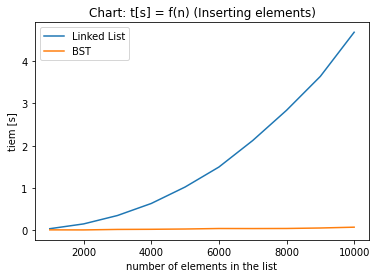

In [79]:
for i in TimeTabAdd:
  plt.plot([i for i in range(1000,11000,1000)],list(i))
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n) (Inserting elements)")
plt.legend(['Linked List','BST'])
plt.show()

Deleting all elements from structure:

In [83]:
data = {'LinekdList':TimeTabDel[0],'BST':TimeTabDel[1]}
index = [i for i in range(100,1100,100)]
df = pd.DataFrame(data,index)
print('Deleting time N elments:','\n')
print(df)

Deleting time N elments: 

      LinekdList       BST
100     0.029676  0.003938
200     0.119882  0.008859
300     0.278558  0.015070
400     0.509875  0.018506
500     0.819950  0.025743
600     1.232660  0.031201
700     1.760063  0.036337
800     2.404560  0.044946
900     3.129135  0.049544
1000    3.991909  0.057722


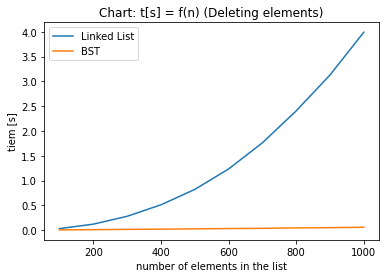

In [84]:
for i in TimeTabDel:
  plt.plot([i for i in range(100,1100,100)],list(i))
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n) (Deleting elements)")
plt.legend(['Linked List','BST'])
plt.show()

Deleting all elements from BST chart:

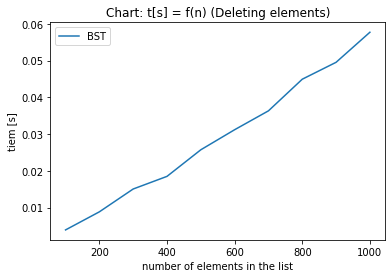

In [85]:

plt.plot([i for i in range(100,1100,100)],TimeTabDel[1])
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n) (Deleting elements)")
plt.legend(['BST'])
plt.show()

### In addition, examine the time necessary to search elements in each of the structures ( function of n) - by measuring the average search time of all elements in turn, if necessary run several turns). In this case, you should compare the times of three following structures: the ordered list, BST and Balanced BST (BBST). The element again should be selected randomly.

## AVL - (named after inventors Adelson-Velsky and Landis) is a self-balancing binary search tree.

AVL item class:

In [0]:
class AVLNode(object):
    def __init__(self,name ,surname, indexNo):
        self.name = name
        self.surname = surname
        self.key = indexNo
        self.leftSite = None
        self.rightSite = None
        self.height = 1

AVT tree class:

In [0]:
class AVLTree(object):

    def getHeight(self,root):
        if not root:
            return 0
        return root.height

    def getBalance(self,root):
        if not root:
            return 0
        return self.getHeight(root.leftSite)-self.getHeight(root.rightSite)

    def insertStudent(self, root,item):
        if root is None:
            return item
        elif item.key < root.key:
            root.leftSite = self.insertStudent(root.leftSite, item)
        else:
            root.rightSite = self.insertStudent(root.rightSite, item)

        root.height = 1 +max(self.getHeight(root.leftSite),self.getHeight(root.rightSite))

        balance = self.getBalance(root)

        if balance > 1 and item.key < root.leftSite.key:
            return self.rightRotate(root)

        if balance < -1 and item.key > root.rightSite.key:
            return self.leftRotate(root)
        if balance > 1 and item.key > root.leftSite.key:
            root.leftSite = self.leftRotate(root.leftSite)
            return self.rightRotate(root)
        if balance < -1 and item.key < root.rightSite.key:
            root.rightSite = self.rightRotate(root.rightSite)
            return self.leftRotate(root)
        return root

    def leftRotate(self, mainNode):
        replace = mainNode.rightSite
        child = replace.leftSite

        replace.leftSite = mainNode
        mainNode.rightSite = child

        mainNode.height = 1 + max(self.getHeight(mainNode.leftSite),self.getHeight(mainNode.rightSite))

        replace.height = 1 + max(self.getHeight(replace.leftSite),self.getHeight(replace.rightSite))

        return replace

    def rightRotate(self, mainNode):
        replace = mainNode.leftSite
        child = replace.rightSite

        replace.rightSite = mainNode
        mainNode.leftSite = child

        mainNode.height = 1 + max(self.getHeight(mainNode.leftSite), self.getHeight(mainNode.rightSite))

        replace.height = 1 + max(self.getHeight(replace.leftSite), self.getHeight(replace.rightSite))

        return replace
    def displayStudent(self, item):
        print("Name   : ", item.name)
        print("Surname : ", item.surname)
        print("Index No. : ", item.key)
        print('\n')
    def displayPreorder(self,root):
        # print(root.key)
        if not root:
            return
        self.displayStudent(root)
        self.displayPreorder(root.leftSite)
        self.displayPreorder(root.rightSite)


    def findStudent(self,root,number):
        if root is None or root.key == number:
            return print("Student found in AVL")
        if root.key < number:
            return self.findStudent(root.rightSite, number)
        return self.findStudent(root.leftSite, number)



Insert all items to AVL from .txt file:


In [0]:
def insertAVL(AVL,root):
  f = open("listOfStudents.txt","r")

  for i in f:
    student = i.split(',')
    root = AVL.insertStudent(root,AVLNode(student[0],student[1],int(student[2])))
  f.close() 
  return

### Testing AVL tree:


In [89]:
avl = AVLTree()
root = None

root = avl.insertStudent(root,AVLNode('Jan', 'Kot', 30))
root = avl.insertStudent(root,AVLNode('Bartek', 'Maslanka', 5))
root = avl.insertStudent(root,AVLNode('Karol', 'Duży', 35))
root = avl.insertStudent(root,AVLNode('Justyna', 'Zła', 32))
root = avl.insertStudent(root,AVLNode('Maria', 'Mała', 40))
root = avl.insertStudent(root,AVLNode('Michał', 'Kowalski', 45))

avl.displayPreorder(root)

Name   :  Karol
Surname :  Duży
Index No. :  35


Name   :  Jan
Surname :  Kot
Index No. :  30


Name   :  Bartek
Surname :  Maslanka
Index No. :  5


Name   :  Justyna
Surname :  Zła
Index No. :  32


Name   :  Maria
Surname :  Mała
Index No. :  40


Name   :  Michał
Surname :  Kowalski
Index No. :  45




Test finfStudent function:

In [99]:
avl.findStudent(root, 5)

Student found in AVL


## Create .txt  file:


In [0]:
listGen(15000)

Create AVL, BST and LinkedList:


In [0]:
from random import randint
avl = AVLTree()
testLinkedList = LinkedList()
root = None
BSTroot = None

f = open("listOfStudents.txt","r")
for i in f:
  student = i.split(',')
  root = avl.insertStudent(root,AVLNode(student[0],student[1],int(student[2])))
f.close() 

BSTroot = insertBST(BSTroot)
insertLLis(testLinkedList)

Create results:

In [105]:
TimeTabFind = [[],[],[]]
for i in range(100):
  item = randint(0,15000)

  Timefind = time.time()
  avl.findStudent(root, item)
  TimeTabFind[0].append(time.time()-Timefind)

  Timefind = time.time()
  findStudent(BSTroot, item)
  TimeTabFind[1].append(time.time()-Timefind)

  Timefind = time.time()
  testLinkedList.findStudent(item)
  TimeTabFind[2].append(time.time()-Timefind)


Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL
Student found in BST
Student found in LinkedList
Student found in AVL

Create plot:

In [107]:
data = {'AVL':TimeTabFind[0],'LinekdList':TimeTabFind[1],'BST':TimeTabFind[2]}
index = [15000]
df = pd.DataFrame(data,index)
print('Average time of searching element in 15000 elements:','\n')
print(df)

Average time of searching element in 15000 elements: 

            AVL  LinekdList       BST
15000  0.000111    0.000162  0.001317


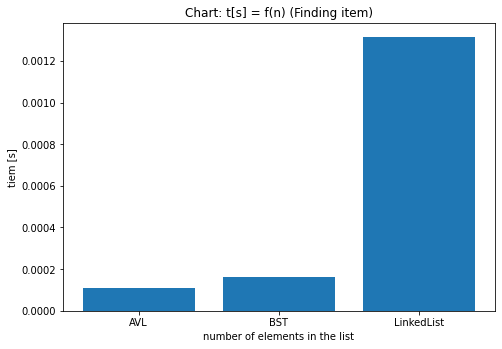

In [106]:
for i in range(len(TimeTabFind)):
  TimeTabFind[i] = np.mean(TimeTabFind[i])
fig = plt.figure()
ax =fig.add_axes([0,0,1,1])
structures = ['AVL', 'BST', 'LinkedList']
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n) (Finding item)")
ax.bar(structures,TimeTabFind)
plt.show()

#IV.Present the conclusions and remarks from the experiments.

The results of performed experiments coincide with theoretical assumptions. BST is significantly faster with removeing elements from structure(Average Time Complexity = Θ(log(n))) and in inserting elements to structureAverage Time Complexity = Θ(log(n))). This is because the linked list has only one pointer to another element(next), as a result, when we add an element in inorder, we must visit every element smaller than the one added(
while it uses less memory than BST), unlike BST which has two markers( left child, right child), thanks to which we divide all elements into bigger and smaller ones than the main root. BTS is better choice in big structures but it is more difficult(dleting function is the hardest) to implement than LinkedList.

AVL - AVL tree is a self-balancing Binary Search Tree (BST) where the difference between heights of left and right subtrees cannot be more than one for all nodes. AVL is ofcorse faster than BST, but AVL consume more memory(each node has to remember its balance factor) and each operation can be slower (because you need to maintain the balance factor and sometimes perform rotations). BST has, avery bad linear worstcase (0(n)) 
but if it's not that bad for us then BST will be a better option for us becouse AVL is more complicated( it takes longer to write, is harder to read and understand and is more likly to contain bugs).


In summary, a reasonable solution is to use the BST structure, it gives us satisfying results which are not as difficult as AVL but not as simple as LinkedList implementation.

Time Complexity table:
(https://drive.google.com/file/d/1lt2gJnYZ3rHMC8y7xrRduhDHgkB5W6aM/view?usp=sharing)





Created by: Bartosz Maślanka 144091